<a href="https://colab.research.google.com/github/VivekSaini11/Data-Science-Project/blob/master/Customer_Service_Request_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCRIPTION**

**Background of Problem Statement** :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

**Problem Objective** :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [ ]:
#Import a 311 NYC service request.
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
data.describe()

,Unique Key,Incident Zip,Landmark,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude
count,1.667000e+03,1660.000000,0.0,1.658000e+03,1658.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1657.000000,1657.000000
mean,3.230437e+07,10875.721687,NaN,1.004847e+06,201644.460193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719997,-73.925700
std,3.868762e+03,543.610625,NaN,2.224896e+04,29514.502532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080937,0.080249
min,3.229755e+07,10001.000000,NaN,9.143460e+05,125817.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.511738,-74.251396
25%,3.230099e+07,10452.000000,NaN,9.911485e+05,182712.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.667979,-73.975113
50%,3.230469e+07,11210.000000,NaN,1.003640e+06,199119.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713056,-73.930202
75%,3.230772e+07,11355.000000,NaN,1.020110e+06,217293.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762943,-73.870579
max,3.231065e+07,11694.000000,NaN,1.065329e+06,270854.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.910061,-73.707404


In [ ]:
data.shape

(1667, 54)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      1667 non-null   int64  
 1   Created Date                    1667 non-null   object 
 2   Closed Date                     1664 non-null   object 
 3   Agency                          1667 non-null   object 
 4   Agency Name                     1667 non-null   object 
 5   Complaint Type                  1667 non-null   object 
 6   Descriptor                      1632 non-null   object 
 7   Location Type                   1667 non-null   object 
 8   Incident Zip                    1660 non-null   float64
 9   Incident Address                1471 non-null   object 
 10  Street Name                     1471 non-null   object 
 11  Cross Street 1                  1453 non-null   object 
 12  Cross Street 2                  14

In [ ]:
data.isna().sum()

Unique Key                           0
Created Date                         0
Closed Date                          3
Agency                               0
Agency Name                          0
Complaint Type                       0
Descriptor                          35
Location Type                        0
Incident Zip                         7
Incident Address                   196
Street Name                        196
Cross Street 1                     214
Cross Street 2                     216
Intersection Street 1             1471
Intersection Street 2             1473
Address Type                         7
City                                 7
Landmark                          1667
Facility Type                        3
Status                               0
Due Date                             0
Resolution Description               0
Resolution Action Updated Date       3
Community Board                      0
Borough                              0
X Coordinate (State Plane

In [ ]:
# convert the Created Date and Closed Date column to datetime format 
data['Created Date']= pd.to_datetime(data['Created Date']) 
data['Closed Date']= pd.to_datetime(data['Closed Date']) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      1667 non-null   int64         
 1   Created Date                    1667 non-null   datetime64[ns]
 2   Closed Date                     1664 non-null   datetime64[ns]
 3   Agency                          1667 non-null   object        
 4   Agency Name                     1667 non-null   object        
 5   Complaint Type                  1667 non-null   object        
 6   Descriptor                      1632 non-null   object        
 7   Location Type                   1667 non-null   object        
 8   Incident Zip                    1660 non-null   float64       
 9   Incident Address                1471 non-null   object        
 10  Street Name                     1471 non-null   object        
 11  Cros

In [ ]:
#Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and 
#create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 
data['Request_Closing_Time']= data['Closed Date']- data['Created Date']
data['Request_Closing_Time']=data['Request_Closing_Time']/np.timedelta64(1,'m')

In [ ]:
#Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 
#4 major conclusions that you can come up with after generic data mining.
major=data.loc[:,"Complaint Type"]
major

0       Noise - Street/Sidewalk
1              Blocked Driveway
2              Blocked Driveway
3               Illegal Parking
4               Illegal Parking
                 ...           
1662    Noise - Street/Sidewalk
1663         Noise - Commercial
1664    Noise - Street/Sidewalk
1665         Noise - Commercial
1666           Blocked Driveway
Name: Complaint Type, Length: 1667, dtype: object

In [ ]:
#First insight - complaints are Blocked Driveway
top=major.value_counts()
top

Blocked Driveway             1125
Illegal Parking              1005
Noise - Commercial            331
Derelict Vehicle              261
Noise - Street/Sidewalk       180
Animal Abuse                  105
Noise - Vehicle               100
Vending                        76
Homeless Encampment            53
Traffic                        37
Posting Advertisement          21
Drinking                        8
Noise - House of Worship        5
Noise - Park                    4
Urinating in Public             3
Panhandling                     3
Bike/Roller/Skate Chronic       2
Graffiti                        1
Name: Complaint Type, dtype: int64

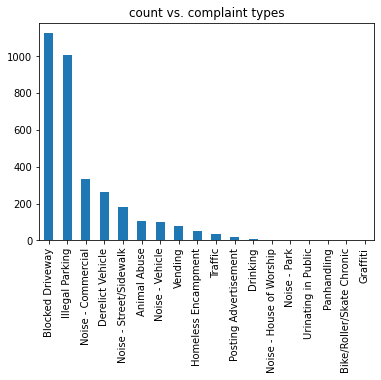

In [ ]:
#Second insight - Plot a bar graph of count vs. complaint types
major.value_counts().plot(kind='bar',title='count vs. complaint types')

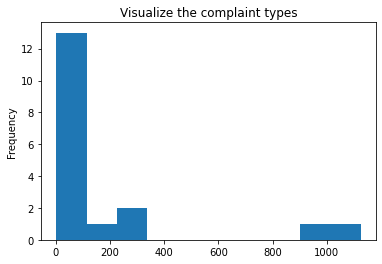

In [ ]:
#Third insight -	Visualize the complaint types
top.plot(kind='hist',title='Visualize the complaint types')

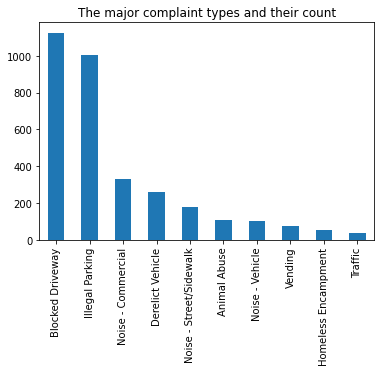

In [ ]:
#Fourth insight -	Display the major complaint types and their count
top.head(10).plot(kind='bar',title='The major complaint types and their count')

In [ ]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
df_agg = data.groupby(['Complaint Type','Location Type']).agg({'Request_Closing_Time': 'mean'})
df_agg

Request_Closing_Time
Complaint Type            Location Type                                   
Animal Abuse              House and Store                        80.383333
                          Residential Building                  178.756250
                          Residential Building/House            242.063235
                          Store/Commercial                      391.044444
                          Street/Sidewalk                       270.720290
Bike/Roller/Skate Chronic Street/Sidewalk                       147.791667
Blocked Driveway          Street/Sidewalk                       275.473473
Derelict Vehicle          Street/Sidewalk                       406.996887
                          Vacant Lot                            343.208333
Drinking                  Club/Bar/Restaurant                   211.272222
                          Residential Building/House            299.366667
                          Store/Commercial                       46.616667
Graffiti                  Residential Building/House             95.783333
Homeless Encampment       Park/Playground                       147.438889
                          Residential Building/House            458.540476
                          Store/Commercial                      223.031481
                          Street/Sidewalk                       197.559804
Illegal Parking           Street/Sidewalk                       241.238994
Noise - Commercial        Club/Bar/Restaurant                   137.716667
                          Store/Commercial                      186.707054
Noise - House of Worship  House of Worship                       81.050000
Noise - Park              Park/Playground                       452.387500
Noise - Street/Sidewalk   Street/Sidewalk                       174.886049
Noise - Vehicle           Street/Sidewalk                       216.606333
Panhandling               Store/Commercial                      103.250000
                          Street/Sidewalk                       217.616667
Posting Advertisement     Residential Building/House            119.583333
                          Street/Sidewalk                        74.385833
Traffic                   Highway                               121.483333
                          Street/Sidewalk                       167.411574
Urinating in Public       Residential Building/House            348.866667
                          Street/Sidewalk                       174.650000
Vending                   Park/Playground                       180.800000
                          Residential Building/House            602.783333
                          Store/Commercial                      267.377083
                          Street/Sidewalk                       138.210859

In [ ]:
#Whether the average response time across complaint types is similar or not (overall)
data_crosstab = pd.crosstab(data['Complaint Type'],data['Location Type'],margins = False)
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Reject null hypothesis')
else:
	print('Accept null hypothesis')

Reject null hypothesis


In [ ]:
#Are the type of complaint or service requested and location related
data_crosstab = pd.crosstab([data['Complaint Type'],data['Location Type']],data['Location'], margins = False) 
stat, p, dof, expected = stats.chi2_contingency(data_crosstab)
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Reject null hypothesis')
else:
	print('Accept null hypothesis')

Reject null hypothesis
